In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedkhaled74","key":"62b567661d492b349dc93447801d7888"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d hereisburak/pins-face-recognition -p /content


Dataset URL: https://www.kaggle.com/datasets/hereisburak/pins-face-recognition
License(s): CC0-1.0
 97% 361M/372M [00:03<00:00, 114MB/s]
100% 372M/372M [00:03<00:00, 104MB/s]


In [7]:
!unzip /content/pins-face-recognition.zip -d /content


Streaming output truncated to the last 5000 lines.
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner37_964.jpg  
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner38_965.jpg  
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner39_966.jpg  
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner3_956.jpg  
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner41_968.jpg  
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner42_969.jpg  
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner44_970.jpg  
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner45_971.jpg  
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner46_972.jpg  
  inflating: /content/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner47_973.jpg  
  inflating: /content/105_clas

In [8]:
!cp -r 105_classes_pins_dataset /content/drive/MyDrive/


In [9]:
# Core Libraries
import os
import numpy as np
import pandas as pd
import numpy as np
# TensorFlow and Keras Imports
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, AveragePooling2D, MaxPooling2D,
    ZeroPadding2D, Activation, Dense, Flatten, Input, Add, ReLU
)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.applications import resnet
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Visualization Libraries
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# OpenCV
import cv2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Machine Learning and Data Processing
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.ndimage import rotate

# Miscellaneous
import itertools


from keras.layers import Input, Conv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Add
from keras.models import Model
from keras.regularizers import l2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Set Matplotlib Inline
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Set Seaborn Style
sns.set(style='white', context='notebook', palette='deep')

In [10]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define dataset path in Google Drive
dataset_path = "/content/drive/MyDrive/105_classes_pins_dataset"
base_dir = "/content/processed_data"  # Directory to store train/val/test sets
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Create directories for processed data
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to extract class name from the folder or filename
def extract_class_name(file_path):
    # Extract class name from the folder name (e.g., pins_Alex Lawther -> Alex Lawther)
    folder_name = os.path.basename(os.path.dirname(file_path))
    return folder_name.split("_", 1)[-1]  # Remove the "pins_" prefix

# Organize dataset into train/val/test sets
def organize_dataset(dataset_path, train_dir, val_dir, test_dir, test_size=0.2, val_size=0.2):
    all_files = []
    class_names = set()

    # Collect all file paths and class names
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(("jpg", "jpeg", "png")):  # Consider only image files
                file_path = os.path.join(root, file)
                all_files.append(file_path)
                class_names.add(extract_class_name(file_path))

    # Create subdirectories for each class in train, val, and test directories
    for class_name in class_names:
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Partition the data
    for class_name in class_names:
        class_files = [f for f in all_files if extract_class_name(f) == class_name]
        train_files, test_files = train_test_split(class_files, test_size=test_size, random_state=42)
        train_files, val_files = train_test_split(train_files, test_size=val_size, random_state=42)

        # Copy files to respective directories
        for file in train_files:
            shutil.copy(file, os.path.join(train_dir, class_name))
        for file in val_files:
            shutil.copy(file, os.path.join(val_dir, class_name))
        for file in test_files:
            shutil.copy(file, os.path.join(test_dir, class_name))

    print("Dataset organized successfully!")

# Run the function to partition the dataset
organize_dataset(dataset_path, train_dir, val_dir, test_dir)

Dataset organized successfully!


In [11]:
# from google.colab import drive
# drive.mount('/content/drive')
train_dir = "./processed_data/train"
val_dir = "./processed_data/val"
test_dir = "./processed_data/test"

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=False,
                                  fill_mode="nearest")

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_data = val_test_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_data = val_test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False


modelDense = Sequential()
modelDense.add(base_model)
modelDense.add(layers.GlobalAveragePooling2D())  # Pooling to reduce the spatial dimensions
modelDense.add(layers.Dense(train_data.num_classes, activation='softmax'))  # Change the number of classes as needed


modelDense.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

modelDense.summary()

Found 11139 images belonging to 105 classes.
Found 2840 images belonging to 105 classes.
Found 3555 images belonging to 105 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 105)                 │         107,625 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,145,129 (27.26 MB)

 Trainable params: 107,625 (420.41 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation generator
aug2 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

historyDense = modelDense.fit(
     train_data,  # Use the data generator directly
    validation_data=val_data,  # Use the validation data generator
    epochs=10,
    batch_size=32
)

# Evaluate the model
loss, accuracy = modelDense.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


349/349 ━━━━━━━━━━━━━━━━━━━━ 238s 579ms/step - accuracy: 0.0382 - loss: 4.5255 - val_accuracy: 0.1264 - val_loss: 3.6828
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 209s 479ms/step - accuracy: 0.1616 - loss: 3.5672 - val_accuracy: 0.1972 - val_loss: 3.3705
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 169s 478ms/step - accuracy: 0.2358 - loss: 3.1979 - val_accuracy: 0.2296 - val_loss: 3.1749
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 167s 471ms/step - accuracy: 0.2858 - loss: 2.9670 - val_accuracy: 0.2437 - val_loss: 3.0594
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 168s 473ms/step - accuracy: 0.3102 - loss: 2.8056 - val_accuracy: 0.2718 - val_loss: 2.9726
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 171s 484ms/step - accuracy: 0.3462 - loss: 2.6630 - val_accuracy: 0.2852 - val_loss: 2.8985
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 170s 480ms/step - accuracy: 0.3831 - loss: 2.5322 - val_accuracy: 0.2891 - val_loss: 2.8015
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 200s 471ms/step - accuracy: 0.4021 - loss: 2.43

112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step
                        precision    recall  f1-score   support

          Adriana Lima       0.47      0.35      0.40        43
          Alex Lawther       0.47      0.52      0.49        31
    Alexandra Daddario       0.19      0.56      0.29        45
          Alvaro Morte       0.55      0.64      0.59        28
           Amanda Crew       0.46      0.25      0.32        24
          Andy Samberg       0.39      0.23      0.29        40
         Anne Hathaway       0.50      0.02      0.05        41
        Anthony Mackie       0.58      0.72      0.64        25
         Avril Lavigne       0.31      0.70      0.43        33
           Ben Affleck       0.67      0.23      0.34        26
            Bill Gates       0.59      0.96      0.73        25
          Bobby Morley       0.58      0.50      0.54        28
      Brenton Thwaites       0.37      0.31      0.34        42
        Brian J. Smith       0.60      0.14      0.23       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


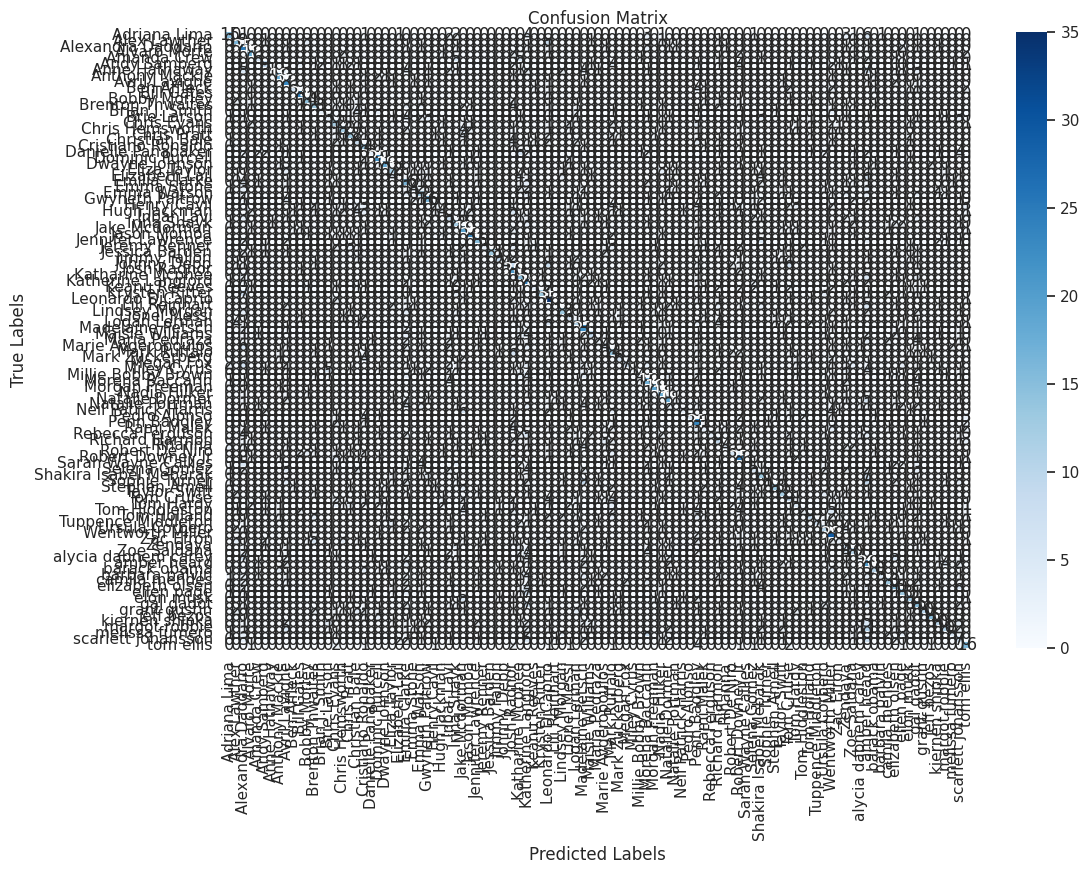

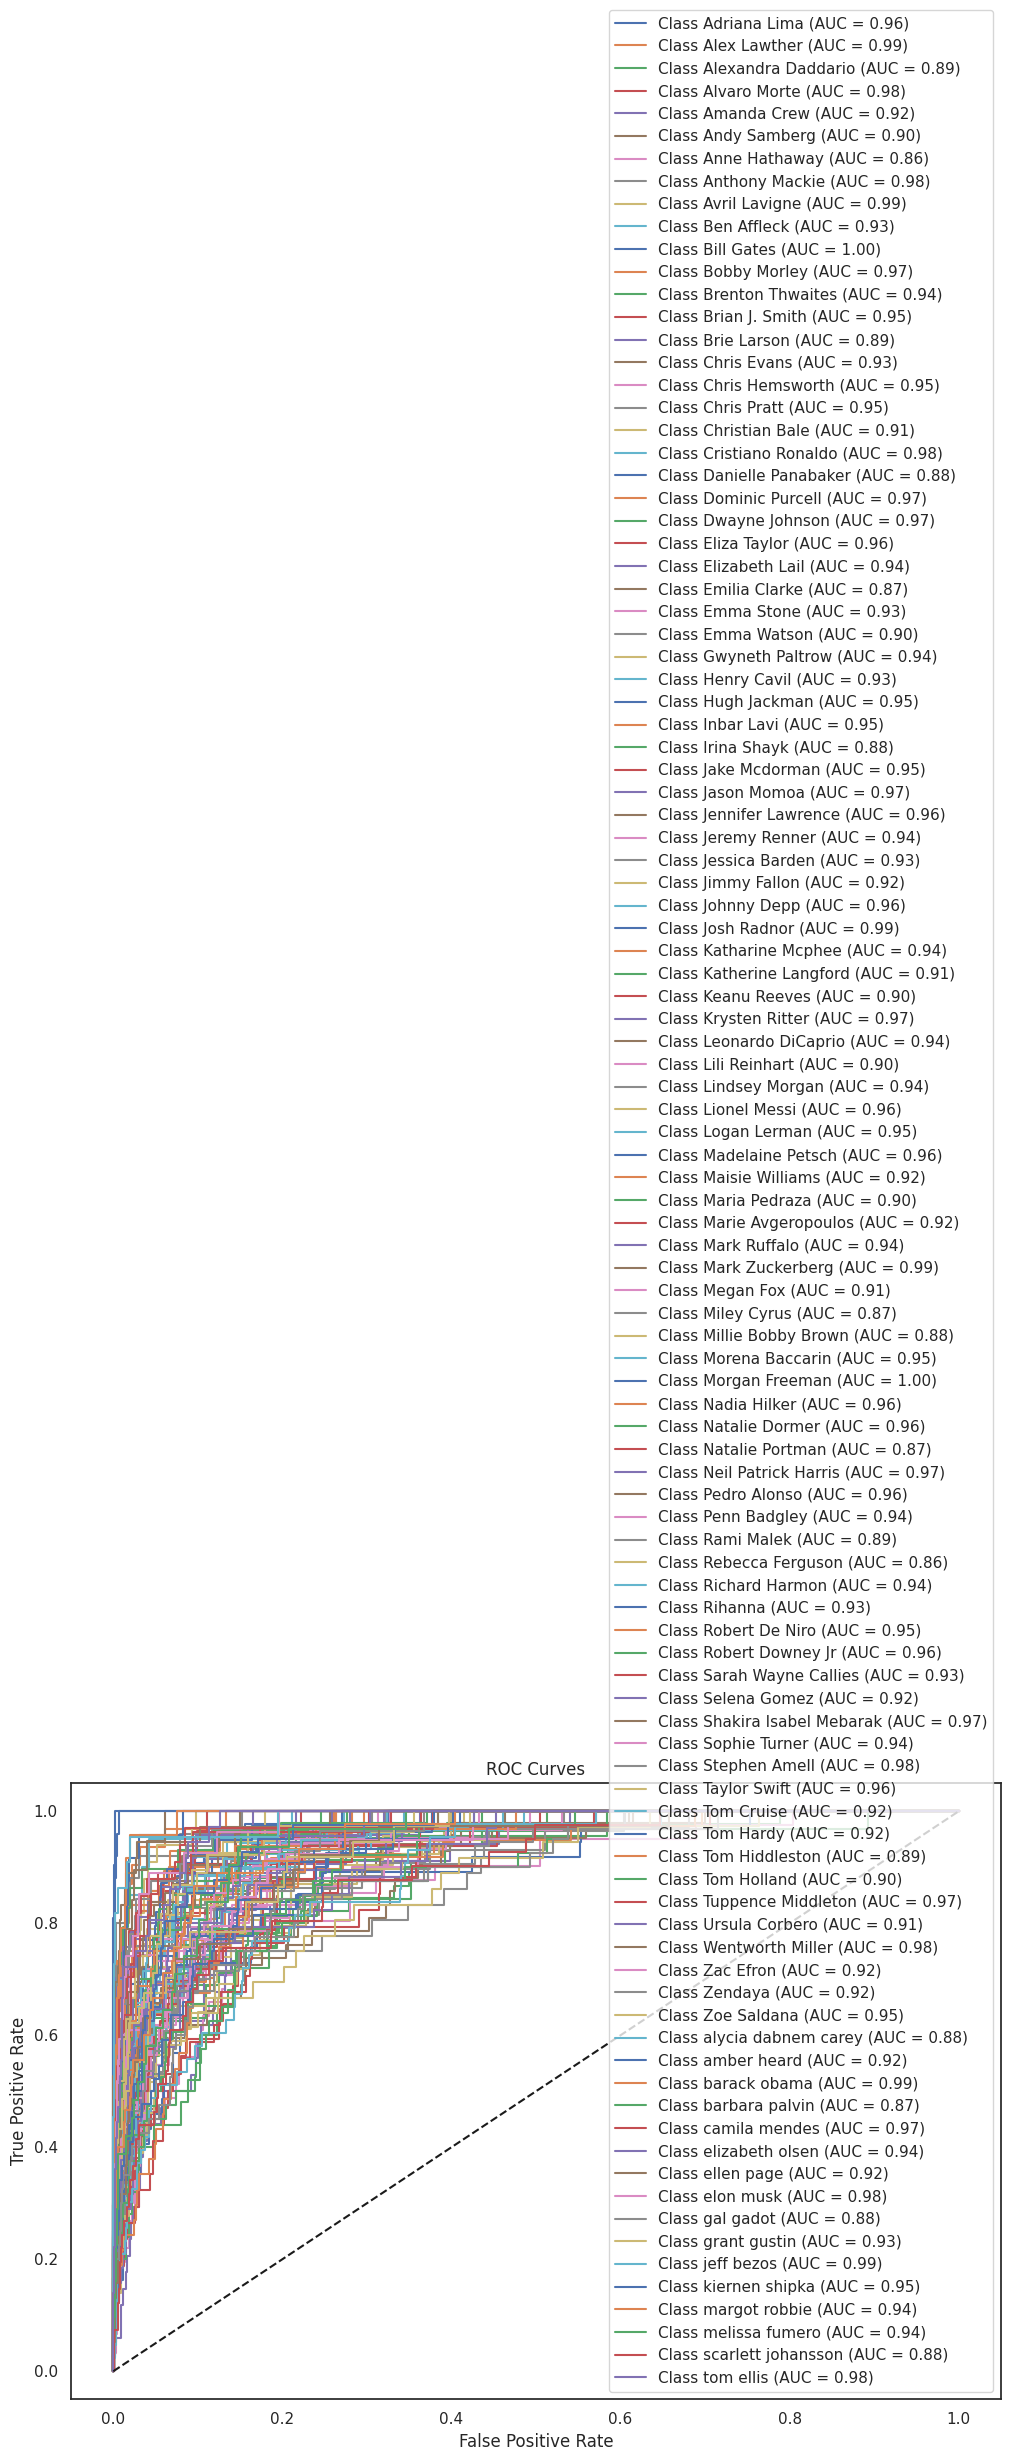

In [19]:
from sklearn.metrics import classification_report

# Get predictions
y_true = test_data.classes  # True labels
y_pred_probs = modelDense.predict(test_data)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted classes

# Classification report
class_names = list(test_data.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# ROC and AUC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

Selected Classes: ['Johnny Depp', 'grant gustin', 'Lindsey Morgan', 'Brenton Thwaites', 'Millie Bobby Brown', 'Natalie Portman', 'Leonardo DiCaprio', 'Sarah Wayne Callies', 'Josh Radnor', 'Chris Hemsworth']
                     precision    recall  f1-score   support

        Johnny Depp       0.78      0.19      0.30        37
       grant gustin       0.76      0.51      0.61        37
     Lindsey Morgan       0.59      0.76      0.67        34
   Brenton Thwaites       0.62      0.55      0.58        42
 Millie Bobby Brown       0.72      0.54      0.62        39
    Natalie Portman       0.53      0.53      0.53        34
  Leonardo DiCaprio       0.55      0.85      0.67        48
Sarah Wayne Callies       0.80      0.38      0.51        32
        Josh Radnor       0.41      1.00      0.58        24
    Chris Hemsworth       0.73      0.75      0.74        32

           accuracy                           0.60       359
          macro avg       0.65      0.61      0.58       35

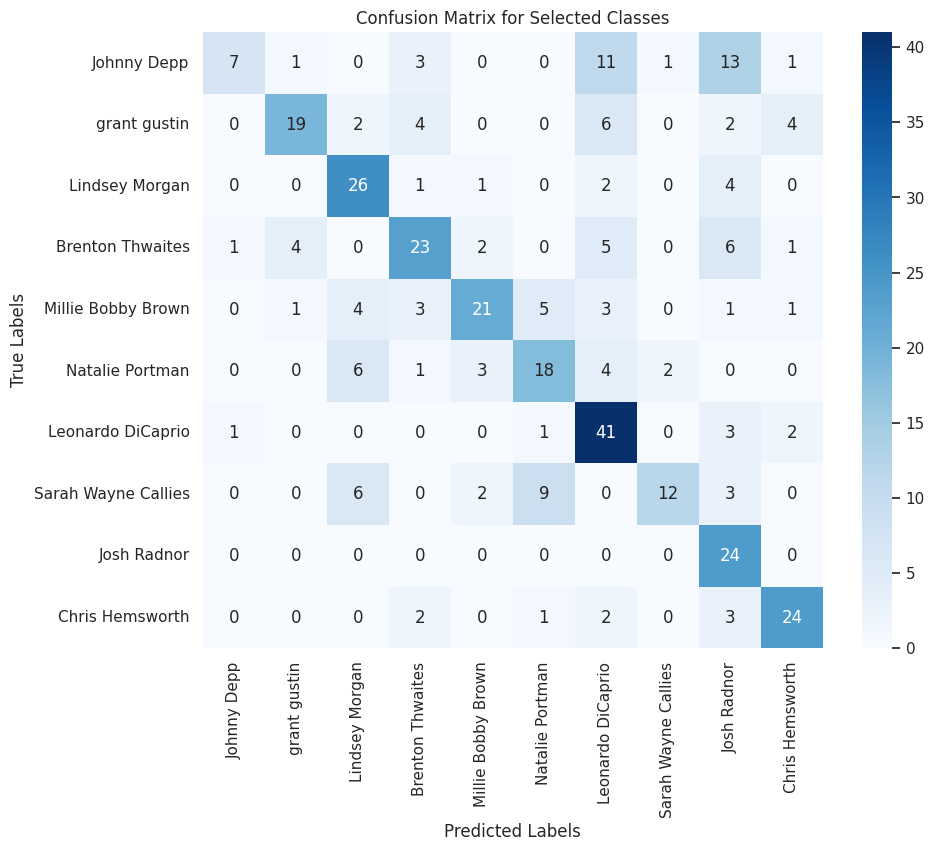

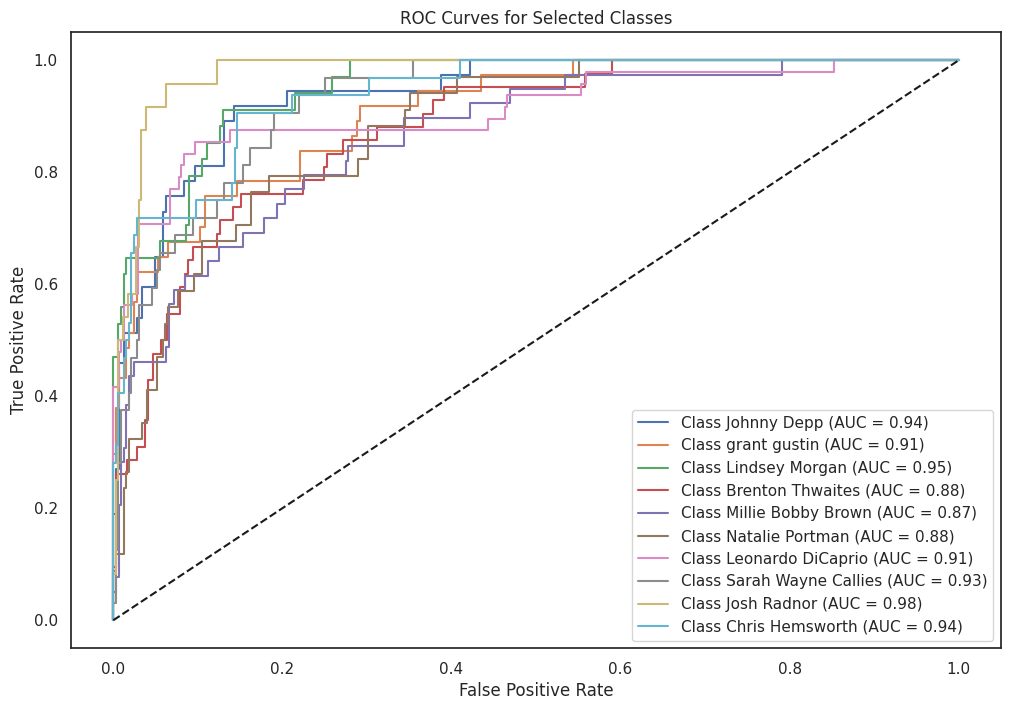

In [20]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Randomly Select 10 Classes
all_classes = list(test_data.class_indices.keys())  # Get all class names
selected_classes = random.sample(all_classes, 10)  # Randomly choose 10 classes
selected_class_indices = [test_data.class_indices[class_name] for class_name in selected_classes]

# Step 2: Get Predictions for the Entire Dataset
#y_pred_probs = xception_model.predict(test_data)  # Predicted probabilities for all classes
#y_true = np.array(test_data.classes)  # Convert to NumPy array for consistency

# Step 3: Filter True Labels and Predictions for Selected Classes
# Mask to filter samples where the true label belongs to selected classes
mask = np.isin(y_true, selected_class_indices)
y_true_filtered = y_true[mask]  # True labels for selected classes
y_pred_probs_filtered = y_pred_probs[mask][:, selected_class_indices]  # Probabilities for selected classes
y_pred_filtered = np.argmax(y_pred_probs_filtered, axis=1)  # Predicted labels for selected classes

# Map original indices to 0-9 for the selected classes
class_mapping = {old: new for new, old in enumerate(selected_class_indices)}
y_true_filtered = np.array([class_mapping[label] for label in y_true_filtered])

# Ensure predictions are mapped using the same `class_mapping`
y_pred_filtered = np.array([class_mapping[selected_class_indices[label]] for label in y_pred_filtered])

# Step 4: Classification Report
print(f"Selected Classes: {selected_classes}")  # Print the randomly selected classes
print(classification_report(y_true_filtered, y_pred_filtered, target_names=selected_classes))

# Step 5: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_true_filtered, y_pred_filtered)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Selected Classes")
plt.show()

# Step 6: ROC and AUC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(selected_classes)):
    # Calculate ROC for each selected class
    fpr[i], tpr[i], _ = roc_curve((y_true_filtered == i).astype(int), y_pred_probs_filtered[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for selected classes
plt.figure(figsize=(12, 8))
for i in range(len(selected_classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {selected_classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Selected Classes")
plt.legend(loc="lower right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


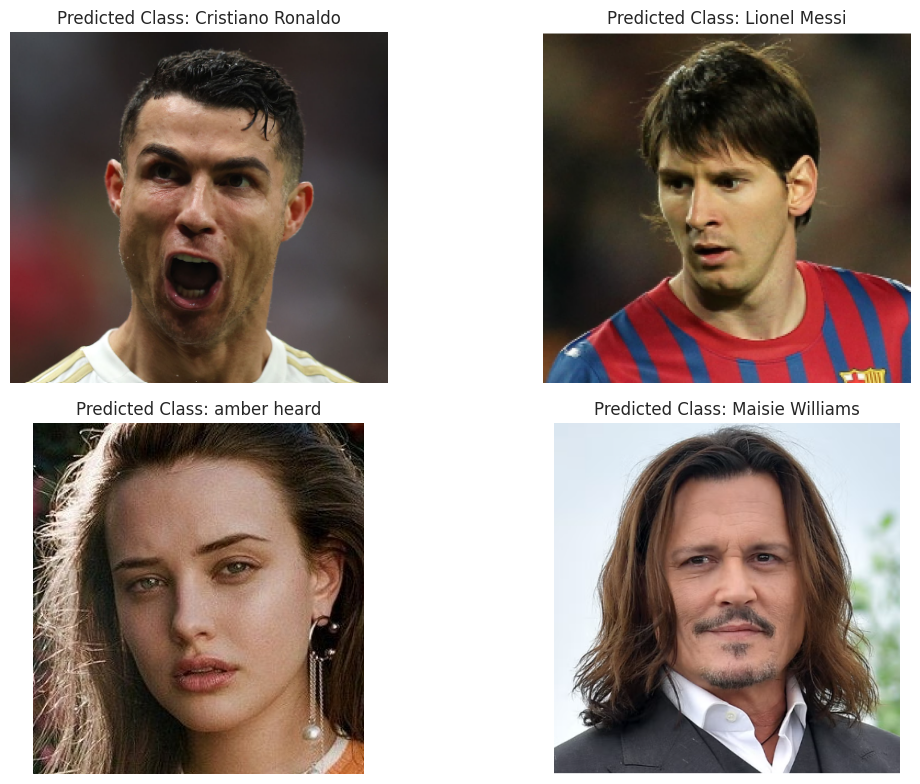

In [42]:
# List of image paths
test_image_paths = [
    "/content/cris.png",
    "/content/messi.png",
    "/content/Katherine.jpg",
    "/content/johnny.png",
]

# Predict the class for each image
def predict_images(model, image_paths, class_indices, target_size=(224, 224)):
    predictions = []
    for image_path in image_paths:
        # Preprocess the image
        img_array = preprocess_image(image_path, target_size=target_size)
        # Predict the class
        predicted_class = predict_image(model, img_array, class_indices)
        predictions.append((image_path, predicted_class))
    return predictions

# Get predictions for all images
predicted_results = predict_images(modelDense, test_image_paths, test_data.class_indices)

# Display results
plt.figure(figsize=(12, 8))
for i, (image_path, predicted_class) in enumerate(predicted_results):
    plt.subplot(2, 2, i + 1)  # 2x2 grid for 4 images
    plt.imshow(image.load_img(image_path))
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis("off")

plt.tight_layout()
plt.show()
